In [77]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [78]:
# leitura da imagem
path0 = os.path.join('..', 'Fotos_stellarium', 'Fotos', 'Triangulum Australe.png')
path1 = "img_1.jpeg"
path2 = "img_2.jpg"

image = cv.imread(path0) 
image_of = cv.imread(path0)

if image is None: 
    print("Erro: Não foi possível carregar a imagem.")

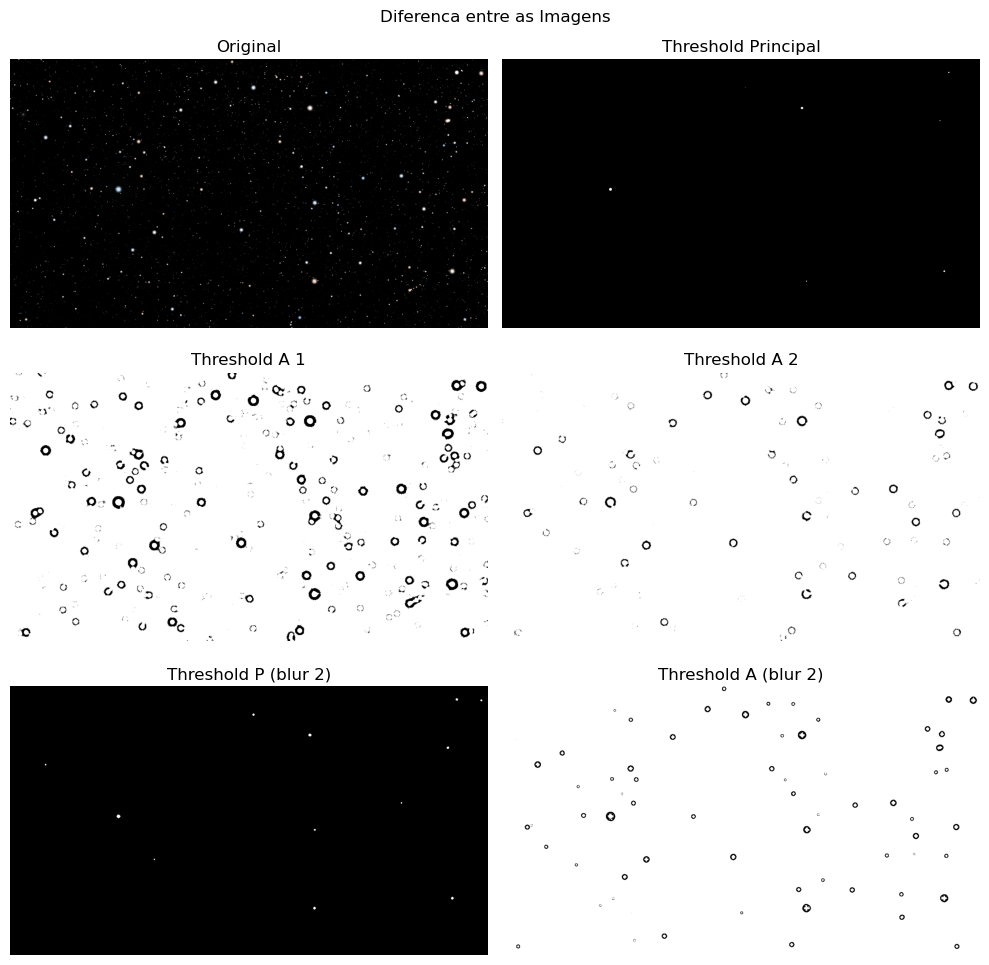

In [79]:
# pre processamento das imagens

# parametros para o pre processamento: (25, 11, 50, 2) | (5, 5, 60, 2) | (7, 9, 80, 2.5) 

size_gau = 25 # tamanho da mascara do filtro gaussiano (impar)
size_adp = 11 # tamanho do vizinhanca para determinar o valor limiar no threshold adaptativo (impar)
valor_limiar = 150 # valor de limiar que sera usado para dividir os valores de intensidade dos pixels
sens = 2 # sensildade do threshold adaptativo

# trocando a escala da imagens de BGR para Gray 
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 

# aplicacao de filtros para remocao de ruidos 
img_blur = cv.GaussianBlur(img_gray, (size_gau,size_gau), 0)

size_med = 11 # tamanho da mascara do filtro de media(impar)
img_blur2 = cv.medianBlur(img_gray, size_med)

# aplicacao de diferente tipos de threshold
_, img_threshold = cv.threshold(img_blur, valor_limiar, 255, cv.THRESH_BINARY)
img_t2 = cv.adaptiveThreshold(img_blur,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY, size_adp, sens)
img_t3 = cv.adaptiveThreshold(img_blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY, size_adp, sens)

retval, img_t4 = cv.threshold(img_blur2, valor_limiar, 255, cv.THRESH_BINARY)
img_t5 = cv.adaptiveThreshold(img_blur2,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY, size_adp, sens)

# plotagem das imagens
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Diferenca entre as Imagens')

axs[0, 0].imshow(image)
axs[0, 0].set_title('Original')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_threshold, cmap='gray')
axs[0, 1].set_title('Threshold Principal')
axs[0, 1].axis('off')

axs[1, 0].imshow(img_t2, cmap='gray')
axs[1, 0].set_title('Threshold A 1')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_t3, cmap='gray')
axs[1, 1].set_title('Threshold A 2')
axs[1, 1].axis('off')

axs[2, 0].imshow(img_t4, cmap='gray')
axs[2, 0].set_title('Threshold P (blur 2)')
axs[2, 0].axis('off')

axs[2, 1].imshow(img_t5, cmap='gray')
axs[2, 1].set_title('Threshold A (blur 2)')
axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


Coordenadas das estrelas identificadas:

(977, 713)
(1420, 681)
(463, 556)
(979, 461)
(348, 418)
(1257, 375)
(114, 252)
(1406, 197)
(963, 156)
(781, 91)
(1514, 45)
(1435, 42)


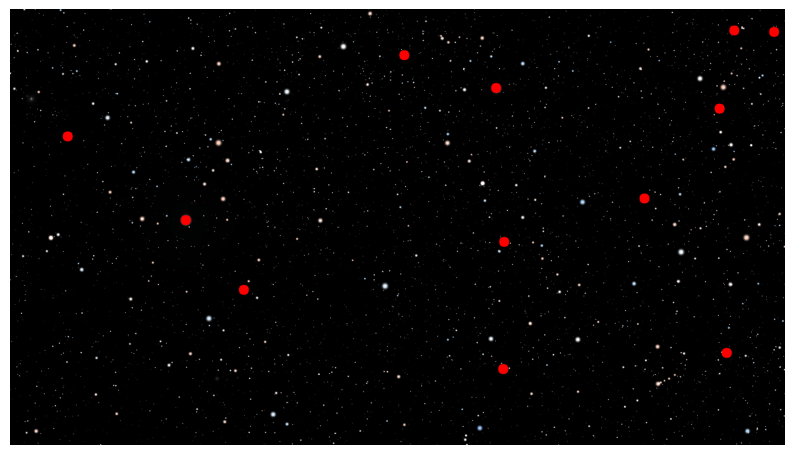

In [80]:
# encontrar contornos das estrelas
contours, _ = cv.findContours(img_t4, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# inicializar uma lista para armazenar as coordenadas dos pontos de interesse
keypoints = []

# adicionar os pontos de interesse dos contornos
for contour in contours:
    M = cv.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        keypoints.append((cX, cY))

# exibir as estrelas detectadas
print("Coordenadas das principais estrelas identificadas:\n")
for kp in keypoints:
    cv.circle(image_of, kp, 10, (255, 0, 0), -1)
    print(kp)

plt.figure(figsize=(10, 10)) 
plt.imshow(image_of)
plt.axis('off')
plt.show()

